# Exercises and Homework for week 3

## physics725: Scientific Programming with Python (SS 2024)

Oliver Cordes & Thomas Erben

---

Homework is due on **Thursday, 02/05/2024, 11:55pm**

 * You only learn a programming language by actively praticing and using it! We therefore **strongly** advise you to work on the homework problems.
 * Please discuss the problems with your student peers and with your tutor.
 * Your code(s) need(s) to be well and appropriately commented!
 * Submit this notebook and, if necessary, additional files in a `zip`-archive with the naming scheme provided by your tutor.

**Topics of this exercise:**
 * Git 101
 * First contact with `numpy`-arrays
 * Basic plots with matplotliba

**Your group number here please:**  Group 06-04

## 1. Lecture Review (0 points)

If you did the lecture review questions [06_Review_questions.ipynb](06_Review_questions.ipynb) (strongly recommended!): 
Please discuss with your tutor and your group any issues/problems you had with them.

---

## 2. Practical git (5 points)

This is the list of tasks you __need__ to do to finish this exercise. It looks complicated but it is a step by step instruction.

### 2.1. Setup your gitlab-Account

Create and setup an account in the HRZ-gitlab instance:

 * generate a ssh-private-public-key-pair (with ssh-keygen in a terminal, if you don't have one)
 * login into https://gitlab.uni-bonn.de/ , click the  *SSO Uni Bonn* button. Fill in your Uni-ID credentials in the shibboleth-formular
 * after login you will be in your main account page, in which you see all your projects (own or cooperation projects), click on the field right of the top `+`-sign to open your account preference
 * open `Edit profile->SSH Keys` page from the left menu
 * click `Add new key` and upload your __public__-part of your previously generated ssh-private-public-key-pair (remove the date in the `Expiration date` field!)

### 2.2. Create your own repository

We recommend that you create your own repository for this course (not only for this homework sheet).

* Return to your main page, click on the uni-bonn-logo on the top left side
* Click the top right button `New project`, choose `Create blank project`
* Project name should be `Physics725`, the repository should be `private` -> Press `Create Projekt`

Now you need to give your tutor the access right to the repository:

* ask your tutor for his `Uni-ID` on gitlab
* use the menu in left sidebar `Manage->Members`; click on `Invite members`
* put the tutors ID in the `Username` field and select the role `Developer`; click `Invite`

Your tutor will get an invitation message.

### 2.3. Work with the repository

Whenever you login into gitlab you will see __all__ of your repositories and can select the webpage of your `Physics725` repository.

**Your task:**
 1. Click on `Code` and then copy the text from `Clone with SSH` or using the copy-button (text will be in the desktop clipboard)
 2. open a terminal and clone this git-repository while pasting the correct URL (e.g. `git@gitlab.uni-bonn.de:<YOURUNIID>/physics725.git`)
 3. Change your personal entries, Name and UniID which you have in eCampus (!), in the repositories, using `git config` 
 4. Create a file `this_is_a_textfile.txt`, add an additional line with some text, add the file to the git system
 5. Commit the changes and push the results back to the server

In [74]:
# https://gitlab.uni-bonn.de/s08bbran/phyics725.git

**Hints:**
 * only one of any homework group need to do this task, but we recommend that everybody should do this!

### 2.4. Update the repository

In this small task you should update the repository to demonstrate that you understood the git basics.

**Your task:**

 1. Move the file `this_is_a_textfile.txt` in a new subfolder `test1`
 2. Create a second folder `test2` and create a new file `this_is_another_textfile.txt` with at least one text line
 3. Commit all changes and push the results back to the server

**Hints:**
* please do **2.3.** and **2.4.** with two individual steps, we can proove it!

---

## 3. Numerical Integration (10 points)

We want to estimate the integral:

$$\int_1^2 \frac{1}{x}{\rm d} x = \log 2 \approx 0.693147 $$

For the calculation we want to compare different mathematical methods. Be $f(x)$ a continuous function on the interval $I=[a;b]$. Be $x_i$ with $a < x_0 < \dots < x_n < b$ a decomposition of the interval $I$. The integral area below the function can be divided into a finite number of small areas $A_i$. The sum of these areas approximates the integral:
$$ \int_a^bf(x)\,{\rm d}x\approx \sum_{i=0}^{n-1} A_i$$

These numerical approximations can be reduced in the way how the small areas are calculated:
1. The simplest approximation is the use of the Riemann sums. The area below the function $f$ will be described by a series of rectangles. One rectangle between $x_i$ and $x_{i+1}$ can be calculated with:
    $$A_i = (x_{i+1}-x_i) \cdot f\left(\frac{x_i+x_{i+1}}2\right)$$
2. Instead of a rectangle one can also define a trapezium:
    $$A_i = (x_{i+1}-x_i) \cdot \left( \frac{f(x_i)+f(x_{i+1})}{2} \right)$$
3. A further approximation is the Simpsons method in which the part below the function is approximated by a parabel. The area can be calculated by:
    $$A_i = (x_{i+1}-x_i)\cdot \frac{1}{6} \left( f(x_i) + 4\cdot f\left(\frac{x_i+x_{i+1}}2\right) + f(x_{i+1}) \right)$$
    
    
To illustrate the different approximations, the small areas for each method are drawn for the $f(x)=\frac{1}{x}$ function:
<table>
<tr>
    <td>
        <img src="figs/riemann.png">
    </td>
    <td>
        <img src="figs/trapez.png">
    </td>
    <td>
        <img src="figs/simpson.png">
    </td>
</tr>
</table>
    
**Your tasks:**

 Implement each of the approximation for the given integral with numpy arrays and compare the results. Which method gives the best value in comparison to the exact value of $\log 2$ (use a print command for your decision!)?  You can assume a separation of the intervall $I=[a;b]$ in $n=50$ equally spaced parts. 
 
**Hints:**

For the calculation of the function values $f(x)$ we pre defined a simple function which you can use. You can use this function with ```y=f(x)```. ```x``` can be a float or integer variable or a numpy-array!

In [75]:
import numpy as np

def f(x):
    """The simple function that returns 1/x."""
    return 1/x


# Riemann Approximation

def riemann(n):
    x = np.linspace(1,2,n+1)
    A = np.zeros(n)
    i = 0
    A_total = 0
    
    while i < np.size(A):
        A[i] = (x[i+1]-x[i]) * f((x[i]+ x[i+1])/(2))
        A_total = A_total + A[i]
        i = i + 1

    return A_total

# testing the riemann approximation for n = 50
riemann(50)

np.float64(0.6931346816534534)

In [76]:
# Trapezium sums approximation

def trapez(n):
    x = np.linspace(1,2,n+1)
    A = np.zeros(n)
    i = 0
    A_total = 0

    while i < np.size(A):
        A[i] = (x[i+1]-x[i]) * ((f(x[i])+f(x[i+1]))/2)
        A_total = A_total + A[i]     
        i = i + 1

    return A_total

# testing trapezium sums approximation for n = 50
trapez(50)

np.float64(0.6931721793101955)

In [77]:
# Simpsons approximation

def simpsons(n):
    x = np.linspace(1,2,n+1)
    A = np.zeros(n)
    i = 0
    A_total = 0

    while i < np.size(A):
        A[i] = (x[i+1]- x[i]) * 1/6 * (f(x[i]) + 4  * f((x[i] + x[i+1]) / 2) + f(x[i+1])) 
        A_total = A_total + A[i]
        i = i + 1

    return A_total

# testing simpsons approximation for n = 50
simpsons(50)

np.float64(0.6931471808723672)

In [78]:
# comparing the different methods
riemann_accuracy = np.abs(np.log(2)-riemann(50))
trapez_accuracy = np.abs(np.log(2)-trapez(50))
simpsons_accuracy = np.abs(np.log(2)-simpsons(50))
print(f"Accuracy of the Riemann approximation is {riemann_accuracy=}")
print(f"Accuracy of the Trapez approximation is {trapez_accuracy=}")
print(f"Accuracy of the Simpsons approximation is {simpsons_accuracy=}")
print(f"Unsurprisingly the Simpsons method is far more accurate (5 decimal places) compared to the Riemann and Trapez method which are about equally accurate.")



Accuracy of the Riemann approximation is riemann_accuracy=np.float64(1.249890649190899e-05)
Accuracy of the Trapez approximation is trapez_accuracy=np.float64(2.4998750250193602e-05)
Accuracy of the Simpsons approximation is simpsons_accuracy=np.float64(3.1242186615543233e-10)
Unsurprisingly the Simpsons method is far more accurate (5 decimal places) compared to the Riemann and Trapez method which are about equally accurate.


---

## 4. Numerical gauss function (15 points)

For the next exercise a Gaussian distribution with zero mean and a variance $\sigma = 1$ is given by

$$ y(x) = C \exp \left(-\frac{x^2}{2}\right) $$

The constant C is fixed so that the integral from $-\infty$ to $\infty$ is 1.

**Your tasks:**
 * make a complete plot of the distribution function against x, with $C=1$. Choose a useful interval.
 * choose one of the methods from exercise 2 to numerically integrate the function over a wide enough range to capture virtually all of the important area. Use the integral result to determine the value of $C$. Compare your results with the correct value of $C$ (use again $\sigma = 1$).
 * what fraction of the area is contained between `-1` and `1`?
 * what fraction of the area is contained between `-3` and `3`? Give the meaning of both fractions!


**Hints**:
 * you can use one code cell for all solutions
 * you can choose a good interval for the numerical integration from the first plot
 * give the result of the fractions of the area in percent of the total area of the integral

The area under the gaussian for C=1 is A=2.506626837573127
We therefore choose C as 1/A
The value estimated for C this way is C=0.39894250911642787. The correct value for C is C_theo=0.3989422804014327
We can see when integrating from -5 to 5 we get basically all the area under the curve.
The are contained between (-1 < x < 1) is A = 0.6826894921370917
The are contained between (-3 < x < 3) is A = 0.997300203936668
This means that for sigma = 1 about 68.3% of the area lies within one standard deviation of the mean value.
While approximately 99.7% of the area are within 3 standard deviations


Text(0.5, 1.0, 'Gaussian curve for different C')

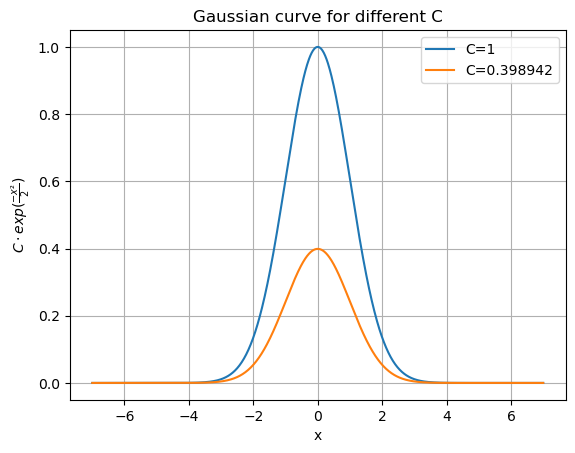

In [150]:
# Simpsons approximation

from matplotlib import pyplot as plt  # import pyplot 

def g(C,x):     # def function that returns gaussian curve for specified C
    ''' Gaussian with sigma=1. Input values are x and C'''
    return C * np.exp(-x**2/2) 

def simpsons(a,b,n,C):      # adjust algorithm from before to take the gaussian instead of 1/x
    x = np.linspace(a,b,n+1)
    A = np.zeros(n)
    i = 0
    A_total = 0

    while i < np.size(A):
        A[i] = (x[i+1]- x[i]) * 1/6 * (g(C,x[i]) + 4  * g(C,((x[i] + x[i+1]) / 2)) + g(C,x[i+1])) 
        A_total = A_total + A[i]
        i = i + 1

    return A_total

# testing simpsons approximation for n = 50
print(f"The area under the gaussian for C=1 is A={simpsons(-5,5,1000, 1)}")
C_exp = 1/simpsons(-5,5,1000,1)

plt.plot(x,g(1,x), label='C=1') 
print(f"We therefore choose C as 1/A")

C_theo = 1/np.sqrt(2*np.pi)

print(f"The value estimated for C this way is C={C_exp}. The correct value for C is C_theo={C_theo}")
print(f"We can see when integrating from -5 to 5 we get basically all the area under the curve.")

plt.plot(x,g(C_exp,x), label='C=0.398942')


# Fraction of area contained between -1 and 1 and between -3 and 3 
print(f"The are contained between (-1 < x < 1) is A = {simpsons(-1,1,1000, C_theo)}")
print(f"The are contained between (-3 < x < 3) is A = {simpsons(-3,3,1000, C_theo)}")

# Meaning of the values
print(f"This means that for sigma = 1 about 68.3% of the area lies within one standard deviation of the mean value.")
print(f"While approximately 99.7% of the area are within 3 standard deviations")
 


plt.xlabel('x')
plt.ylabel(r'$C \cdot exp(\frac{-x²}{2})$')
plt.grid()
plt.legend()
plt.title('Gaussian curve for different C')

---

## 5. Traps while plotting (5 points)

Somebody wants to plot the function $f(x) = \frac{\sin(30x)}x$ with $x\in [1,10]$. The submitted code looks like:

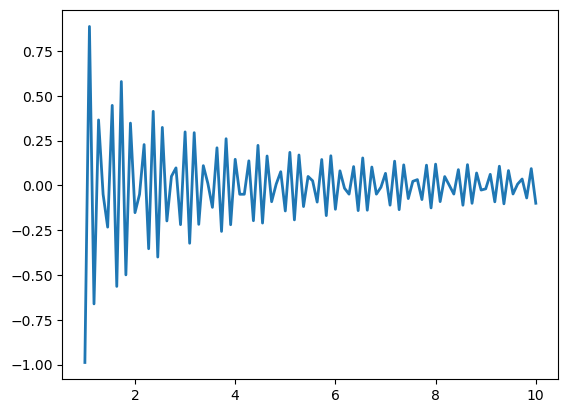

In [81]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(1, 10, 100)
y = np.sin(30. * x) / x

fig, ax = plt.subplots()

ax.plot(x, y, linewidth=2.0)

Obviously the result was not really wanted. *What's wrong with the code?*

A lecturer creates this plot to demonstrate a better solution:

<img src="figs/trapsplotting.png" style="width:50%"/>

**Tasks**:

Recreate the plot which includes the faulty (blue plot) and corrected code (red plot) for the function $f(x) = \frac{\sin(30x)}x$ with $x\in [1,10]$. The corrected plot is shifted by `+2` on the y-axis. Please create also the legend box and all labels. Write the reason why the original code is not correct as a comment into the code.

Text(0.5, 1.0, 'Traps while plotting')

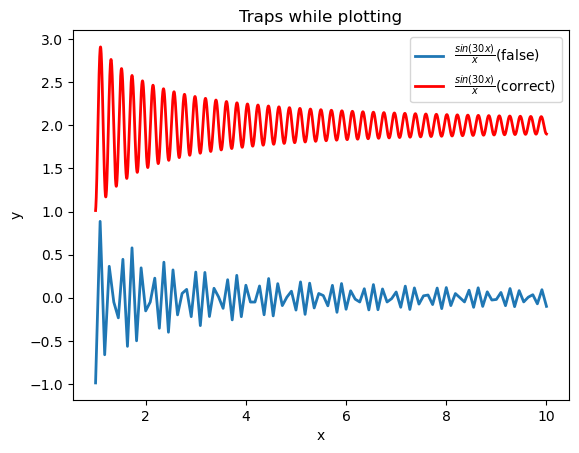

In [82]:
x = np.linspace(1, 10, 100)
y = np.sin(30. * x) / x
x_correct = np.linspace(1,10,10000)
y_correct = np.sin(30. * x_correct) / x_correct + 2

fig, ax = plt.subplots()

ax.plot(x, y, linewidth=2.0, label= r'$\frac{sin(30x)}{x}$(false)')
ax.plot(x_correct, y_correct, 'r', linewidth=2.0, label= r'$\frac{sin(30x)}{x}$(correct)')

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Traps while plotting')

# The reason why the code is not correct is the amount of x values. The np.linspace creates an array with numbers equally spaced between the first and the second parameter.
# The number of values is defined by the third parameter. Since there were only 100 values in x, and the plt.plot function from matplotlib connects the data points in a plot
# by default, there were just not enough values and so the data points are just connected by a straight line. In order to resolve this, a sufficient number of x values has to be
# chosen, so that the data points are close enough together.  

## 6.  Temperature Data (15 Punkte)

As a first data analysis task, we want to look at a data set that we will continue to use in the coming exercises.

The student Annika, who also lives in Bonn, would like to find out about the development of meteorological data in Bonn over a certain period of time and make a few small calculations.


The data is stored in the file `NewWeather.csv.gz`. The following command shows the first lines (please ignore the Linux errors!):

In [83]:
!gunzip -c  NewWeather.csv.gz | head -10

gzip: NewWeather.csv.gz: No such file or directory



The data is stored in the file `NewWeather.csv.gz`. The following command shows the first lines (please ignore the Linux errors!):As you can see, we have collected various measured values in the data set. In a first task Annika is interested in the pure temperatures (column 3, index 2!). For the sake of simplicity, the measurement date is given as a year plus a fraction of a year. For example, 6 January 2000 (OO:00h) would be coded as the 5th day of the year 2000: $2000 + \frac{5}{366} \approx 2000+0.01366 = 2001.01366$. Of course, you can also calculate hours and minutes as fractions of days and accordingly as fractions of years.


**The entire task is divided into small sections that build on each other. If you have problems with a subtask, ask your tutor directly for help so that this task does not drag on indefinitely. We also want to practise masking/selecting data for the first time here!**


**6.1** As a first step, you should read the data from the file with `np.loadtxt` and split it into an array with the days and an array with the temperatures as in the lecture. Create a test plot of the temperatures against the dates. A `scatter` plot is recommended for an initial overview. You will see that some temperatures have “unrealistic” values (which value?). Sort out the nonsensical temperatures from the data set and then plot the remaining temperatures against the date as a check in a line plot. Make sure that the plots are complete as specified in the lecture (labels, titles, etc.).


**Notes:**
- we have a CSV file, so you should call `np.loadtxt` with an appropriate **delimiter**!

In [84]:
# loading the data
MESS_DATUM,Luftdruck,Temperatur,Temperatur_Boden,Feuchte,Regendauer,Niederschlagshöhe,Windgeschwindigkeit,Windrichtung = np.loadtxt('NewWeather.csv', delimiter=',', unpack=True)

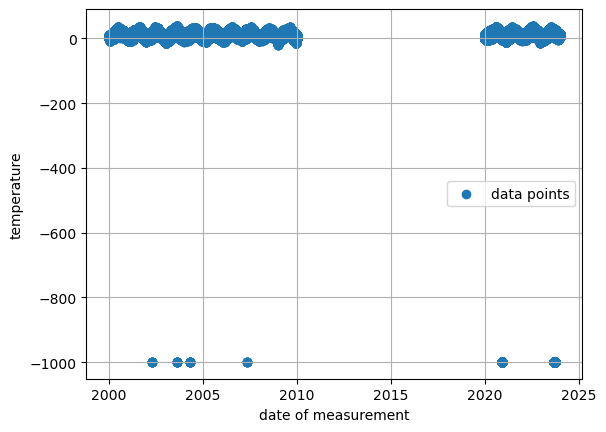

In [85]:
plt.scatter(MESS_DATUM, Temperatur, label='data points')

plt.xlabel('date of measurement')
plt.ylabel('temperature')
plt.legend(loc='center right')
plt.grid()

There are temperatures some data points where the temperature is T = -999.0 which is obviously not a realistic temperature value


/tmp/ipykernel_6672/3867453882.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


Text(0.5, 1.0, 'Filtered Temperature Data')

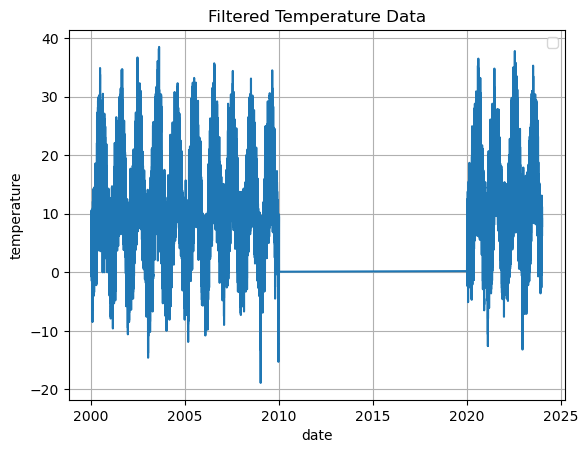

In [86]:
print(f"There are temperatures some data points where the temperature is T = {np.min(Temperatur)} which is obviously not a realistic temperature value" )
Temperatur_fixed = Temperatur[Temperatur>-100]
MESS_DATUM_fixed = MESS_DATUM[Temperatur>-100]

plt.plot(MESS_DATUM_fixed, Temperatur_fixed)
plt.xlabel('date')
plt.ylabel('temperature')
plt.legend()
plt.grid()
plt.title('Filtered Temperature Data')


**6.2** As you saw at the end of the first task, the data set has a gap (~2010-2019) and therefore the line plot looks a bit strange. Correct the line plot so that the gap can be seen as a gap and is not connected!

**Notes:**
 - it should be clear that you can't do this in **one** line plot, but you can split the data into two halves and then plot them with the same colour (colour doesn't matter)
 - think about suitable masks for splitting (in this case of gaps, the boundaries do not have to be exact, why?)

/tmp/ipykernel_6672/2658612058.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


Text(0.5, 1.0, 'Temperature Data with not gap not connected')

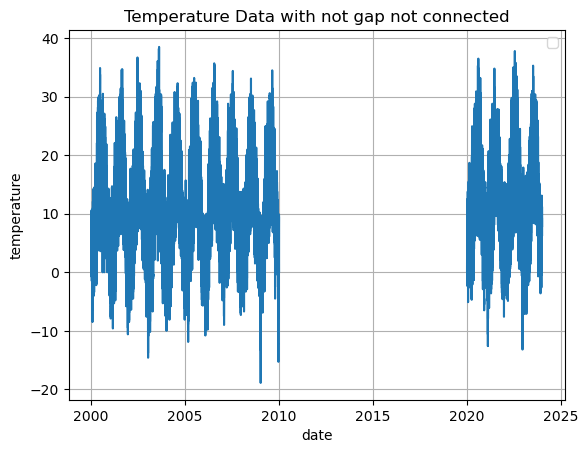

In [87]:
# cut data into first_part and second_part arrays
date_first_part = MESS_DATUM_fixed[MESS_DATUM_fixed<2015]
temperature_first_part = Temperatur_fixed[MESS_DATUM_fixed<2015]

date_second_part = MESS_DATUM_fixed[MESS_DATUM_fixed>2015]
temperature_second_part = Temperatur_fixed[MESS_DATUM_fixed>2015]


plt.plot(date_first_part, temperature_first_part, 'tab:blue')
plt.plot(date_second_part, temperature_second_part, 'tab:blue')

plt.xlabel('date')
plt.ylabel('temperature')
plt.legend()
plt.grid()
plt.title('Temperature Data with not gap not connected')


**6.3** Of course, it is not so meaningful if you display all the data together, but as you have seen, you can at least visually assess the data. Annika would now like to concentrate specifically on the year 2003 (her year of birth). To do this, write an `extract_data_year` that returns the filtered data as arrays. Use the desired year and the two arrays for the days and temperatures as transfer arguments. Only plot the data for 2003!

**Note:**
 * You can use the year fractions for the x-axis, a conversion to months/days is not useful here.
 * splitting into 2 data sets is not necessary here, as we are analysing a continuous area with 2003

Text(0.5, 1.0, '2003 Temperature Data')

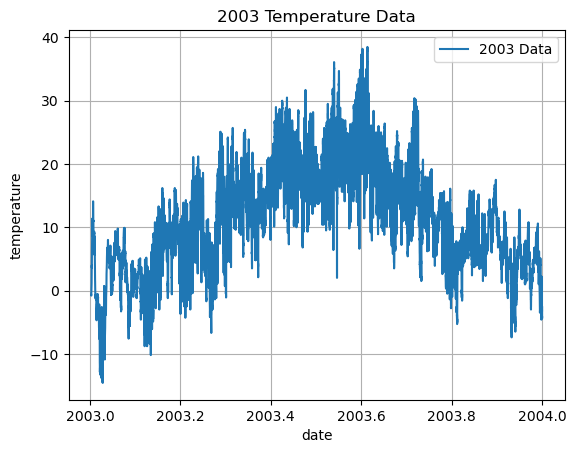

In [88]:
# A function that cuts the dates and temperatures to a desired year using slicing
def extract_data_year(year):
    ''' cuts the dates and the temperatures to the specified year
    returns the dates and temperatures in arrays'''
    dates = MESS_DATUM_fixed[(MESS_DATUM_fixed >= year) & (MESS_DATUM_fixed < year + 1 ) ]
    temperatures = Temperatur_fixed[(MESS_DATUM_fixed >= year) & (MESS_DATUM_fixed < year + 1 ) ]

    return dates, temperatures

# use the function for the year 2003
dates_2003, temperatures_2003 = extract_data_year(2003)

# plot the cut data
plt.plot(dates_2003, temperatures_2003, label='2003 Data')
plt.xlabel('date')
plt.ylabel('temperature')
plt.legend()
plt.grid()
plt.title('2003 Temperature Data')


**6.4** With this information, Annika can also do some statistics for all months of 2003.
To do this, you should calculate a mean value and the standard deviation for each month and display these in an error plot (`ax.errorbar(...)`),
in which the variance is used as the error in $y$.
Write another function `extract_data_month` which extracts the data for the corresponding month from the arrays for the days and temperatures and a specified month from $0\ldots11$ (January to December).

**Note:**

 * Create two new arrays for the results! The function `np.zeros(5, dtype=np.float64)` is helpful here, e.g. to create an array with 5 values, each of which is 0.
 * To calculate the mean and variance of an array $x$, use the functions `x.mean()` and `x.std()`.
 * To mask the individual months, you can extract the year fraction from the date using the modulo operator. Each month should simply be a $\frac{1}{12}$ of the year, i.e. all months should be the same length. Take a look at the following example:

In [89]:
# Your solution here please